<a href="https://colab.research.google.com/github/vikrantmehta123/dl-for-coders-workbook/blob/main/Fastbook_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

In [ ]:
from fastbook import *

### Get Data    

In [ ]:
from fastai.collab import *
from fastai.tabular.all import *

path = untar_data(URLs.ML_100k)

In [ ]:
!cat /root/.fastai/data/ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [ ]:
import pandas as pd

ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names=['user', 'movie', 'rating', 'timestamp'])

ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
pvt = ratings.pivot(index='user', columns='movie', values='rating')
pvt

movie  1     2     3     4     5     6     7     8     9     10    11    12    \
user                                                                            
1       5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0   2.0   5.0   
2       4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   4.0   NaN   
5       4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
939     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN   
940     NaN   NaN   NaN   2.0   NaN   NaN   4.0   5.0   3.0   NaN   NaN   4.0   
941     5.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN   
942     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
943     NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   4.0   5.0   

movie  13    14    15    16    17    18    19    20    21    22    23    24    \
user                                                                            
1       5.0   5.0   5.0   5.0   3.0   4.0   5.0   4.0   1.0   4.0   4.0   3.0   
2       4.0   4.0   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5       NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN   3.0   NaN   NaN   4.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
939     NaN   NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
940     NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
941     NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
942     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
943     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   4.0   4.0   4.0   

movie  25    26    27    28    29    30    31    32    33    34    35    36    \
user                                                                            
1       4.0   3.0   2.0   4.0   1.0   3.0   3.0   5.0   4.0   2.0   1.0   2.0   
2       4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5       3.0   NaN   NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
939     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
940     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
941     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
942     NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN   NaN   NaN   
943     NaN   NaN   4.0   4.0   NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN   

movie  37    38    39    40    41    42    43    44    45    46    47    48    \
user                                                                            
1       2.0   3.0   4.0   3.0   2.0   5.0   4.0   5.0   5.0   4.0   4.0   5.0   
2       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5       NaN   NaN   NaN   4.0   NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
939     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
940     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   
941     NaN   NaN   NaN   Na

In [ ]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', usecols=(0, 1), names=('movie', 'title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,782,Starship Troopers (1997),2
1,943,Judge Dredd (1995),3
2,758,Mission: Impossible (1996),4
3,94,Farewell My Concubine (1993),5
4,23,Psycho (1960),4
5,296,Secrets & Lies (1996),5
6,940,"American President, The (1995)",4
7,334,Star Trek VI: The Undiscovered Country (1991),1
8,380,Braveheart (1995),4
9,690,So I Married an Axe Murderer (1993),1


In [ ]:
n_users = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

n_users, n_movies, n_factors

(944, 1665, 5)

In [ ]:
import torch

user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)
user_factors.shape, movie_factors.shape

(torch.Size([944, 5]), torch.Size([1665, 5]))

In [ ]:
user_factors.shape, movie_factors.shape

(torch.Size([944, 5]), torch.Size([1665, 5]))

In [ ]:
from torch.nn import Module

class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0, 5.5)):
        super().__init__()
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])

        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [ ]:
x, y  = dls.one_batch()
x.shape

torch.Size([64, 2])

In [ ]:
model = DotProduct(n_users, n_movies, 5)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [ ]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.067291,1.060765,00:21
1,0.908200,0.957252,00:12
2,0.879762,0.931280,00:11
3,0.851035,0.911192,00:09
4,0.832689,0.905598,00:08


In [ ]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [ ]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.940343,0.994774,00:11
1,0.654834,0.932719,00:11
2,0.460817,0.941030,00:11
3,0.353244,0.942049,00:11
4,0.358489,0.941680,00:11


In [ ]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0, 5.5)):
        super().__init__()
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])

        return sigmoid_range(res, *self.y_range)

In [ ]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.857896,0.939347,00:13
1,0.560058,0.907709,00:12
2,0.401965,0.935907,00:11
3,0.320698,0.946591,00:12
4,0.298656,0.947322,00:11


In [ ]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.887815,0.940140,00:12
1,0.670216,0.892752,00:11
2,0.528781,0.873573,00:12
3,0.454760,0.857555,00:11
4,0.431311,0.853212,00:11


In [ ]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [ ]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        super().__init__()
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users*movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)

In [ ]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.883196,0.942655,00:11
1,0.681482,0.884854,00:11
2,0.514445,0.867803,00:12
3,0.461154,0.854282,00:12
4,0.445479,0.850052,00:12


In [ ]:
movie_bias = learn.model.movie_bias.squeeze()
movie_bias.shape

torch.Size([1665])

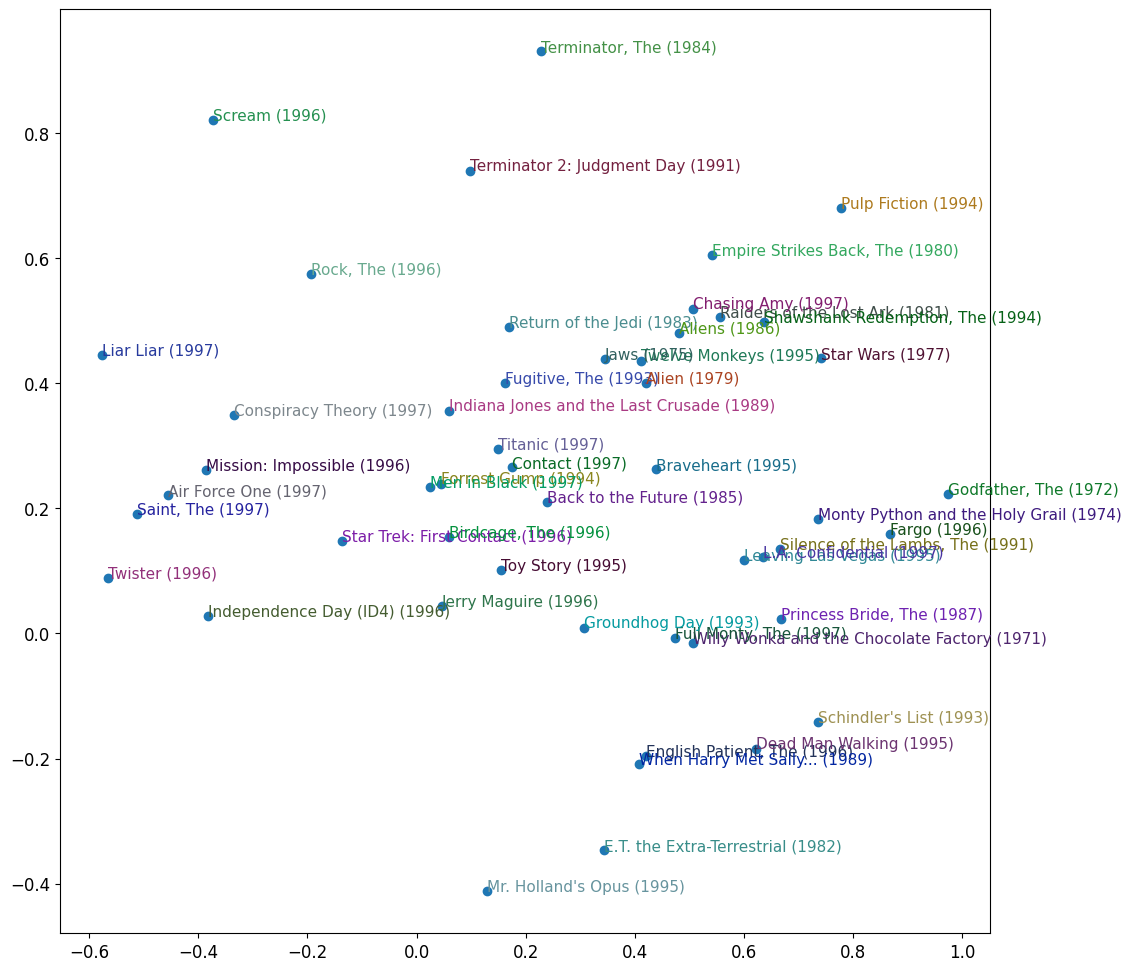

In [ ]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [ ]:
learn = collab_learner(dls, n_factors=40, y_range=(0, 5.5))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.852680,0.943829,00:11
1,0.708880,0.881417,00:11
2,0.600755,0.862600,00:11
3,0.507190,0.844333,00:11
4,0.498786,0.841291,00:13


In [ ]:
embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [ ]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        super().__init__()
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range

    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)


In [ ]:
model = CollabNN(*embs)

In [ ]:
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.928729,0.944633,00:14
1,0.876195,0.907280,00:15
2,0.810692,0.884772,00:15
3,0.806646,0.863556,00:14
4,0.755684,0.858288,00:15


In [ ]:
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.971804,0.971225,00:20
1,0.909957,0.923164,00:17
2,0.841022,0.885817,00:16
3,0.785735,0.862530,00:16
4,0.742002,0.860609,00:17


In [ ]:
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.946854,0.982118,00:19
1,0.889664,0.923197,00:20
2,0.831118,0.887612,00:18
3,0.755697,0.874024,00:17
